In [61]:
from itertools import product
from typing import Dict, List, Any

import numpy as np
import matplotlib.pyplot as plt

from IOData.IOData import InputRule

from simulators.track_simulator import TrackSimulator
from simulators.simulation_settings import SafetyFilterTypes, TrackFilterTypes, SimulationInputRule, ModelType
from tools.simualtion_results import Results

from tools.simple_track_generator import trackGenerator

In [62]:
save_fig = False

simualte_type = 'TRACK_SIMULATE'

Simulator = {
    # 'SINGLE_CURVATURE'  : SingleCurvatureSimulator,
    'TRACK_SIMULATE'    : TrackSimulator,
}.get(simualte_type)

simulator = Simulator()
simulator.a_d_max = 2
simulator.delta_d_max = 0.12
simulator.use_saved_data = False
simulator.save_data = False
simulator.simulate_model_type = ModelType.KINEMATIC
simulator.data_model_type = ModelType.KINEMATIC
simulator.filter_model_type = ModelType.KINEMATIC
simulator.t_sim = 5.0
simulator.num_predicted_traj = 10
simulator.global_initial_state = np.array([0.0, 0.0, 0.0, 0.5, 0.0, 0.0])
simulator.cur = 1/0.3
simulator.track_fun_name = 'oval_track'
simulator.lag = 15
simulator.save_predicted_traj_regular = False
# simulator.v_x_max = 2.7
simulator.save_dataset_after = False

simulator.t_data = 10.0
t_new_data = simulator.t_data * 0.6
simulator.data_input_rule = InputRule.PRBS_TIMES_RANDOM_MEAN
# simulator.data_input_rule = InputRule.RANDOM_2_WITH_MEAN

# simulator.n_v_max = 0
# simulator.n_x, simulator.n_y, simulator.n_psi, simulator.n_v = 0,0,0,0
# simulator.n_e_lat_max, simulator.n_mu_max, simulator.n_v_max, simulator.n_l_max = 0,0,0,0 # for test of prediction error

random_seeds = [0]
track_filter_types = [
    # TrackFilterTypes.SINGLE_SEGMENT_ADD_DATA,
    TrackFilterTypes.SINGLE_SEGMENT,
    ]
filter_types = [
    SafetyFilterTypes.INDIRECT_FITTING_TERMINAL,
    SafetyFilterTypes.INDIRECT_FIX_MU,
    SafetyFilterTypes.INDIRECT_ZERO_V,
    # SafetyFilterTypes.INDIRECT_FIX_MU_WEIGHTING,
    # SafetyFilterTypes.INDIRECT_FIX_MU_WEIGHTING_ADD_DATA,
    # SafetyFilterTypes.INDIRECT_ZERO_V_WEIGHTING,
    # SafetyFilterTypes.INDIRECT_ZERO_V_WEIGHTING_ADD_DATA,
    # SafetyFilterTypes.INDIRECT_FIX_MU_ADD_DATA_LATERAL,
    SafetyFilterTypes.INDIRECT_STOP,
    ]
filter_params: Dict[SafetyFilterTypes, List[Dict[str, Any]]] = {
    # SafetyFilterTypes.INDIRECT_FIX_MU_ADD_DATA_LATERAL: [
    #     # {'lam_sig': 50000, 'L': 150, 'c': [[0.3, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    #     {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 150, 'c': [[0.3, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    # ], # good HP for this terminal ingredient and kinematic model
    SafetyFilterTypes.INDIRECT_FITTING_TERMINAL: [
        {'lam_sig': 50000, 'L': 150, 'c': [[0.25, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
        # {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 150, 'c': [[0.25, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    ], # good HP for this terminal ingredient and kinematic model
    SafetyFilterTypes.INDIRECT_FIX_MU: [
        {'lam_sig': 50000, 'L': 150, 'c': [[0.35, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
        # {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 150, 'c': [[0.25, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    ], # good HP for this terminal ingredient and kinematic model
    SafetyFilterTypes.INDIRECT_ZERO_V: [
        {'lam_sig': 50000, 'L': 200, 'c': [[0.35, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
        # {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 150, 'c': [[0.35, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    ], # good HP for this terminal ingredient and kinematic model
    SafetyFilterTypes.INDIRECT_STOP: [
        {'lam_sig': 50000, 'L': 180, 'c': [[0.35, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
        # {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 150, 'c': [[0.35, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    ], # good HP for this terminal ingredient and kinematic model
    # SafetyFilterTypes.INDIRECT_FITTING_TERMINAL: [{'lam_sig': 10000}, {'lam_sig': 50000}, {'lam_sig': 100000}],
    # SafetyFilterTypes.INDIRECT_ZERO_V: [{'L': 80}],
    # SafetyFilterTypes.INDIRECT_STOP: [{'L': 80}],
    # SafetyFilterTypes.INDIRECT_FIX_MU_ADD_DATA_LATERAL: [{'lam_sig': 200000}],
    # SafetyFilterTypes.INDIRECT_FIX_MU_ADD_DATA_LATERAL: [
    #     # {'lam_sig': 50000, 'L': 150, 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]},
    #     {'lam_sig': 150000, 'L': 100, 'R': np.matrix('1,0;0,0'), 'c': [[0.25, 0.1, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.1, 0.05, 0.01, 0.005]], 't_new_data': t_new_data}, # seemingly good for dynamic model, using data from kinematic model???? larger lam_sig is not working
    #     # {'lam_sig': 200000, 'L': 100, 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]},
    #     ], 
    # SafetyFilterTypes.INDIRECT_FIX_MU: [
    #     # {'lam_sig': 50000, 'L': 80, 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]},
    #     # {'lam_sig': 150000, 'L': 80, 'R': np.matrix('1,0;0,0'), 'c': [[0.25, 0.1, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.1, 0.05, 0.01, 0.005]]}, # seemingly good for dynamic model, using data from kinematic model???? larger lam_sig is not working
    #     {'lam_sig': 200000, 'L': 150, 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]},
    #     ], 
    # SafetyFilterTypes.INDIRECT_ZERO_V: [ 
    #     {'lam_sig': 150000, 'L': 150, 'R': np.matrix('1,0;0,0'), 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.1, 0.05, 0.01, 0.005], [0.1, 0.05, 0.01, 0.005]]}, # seemingly good for dynamic model, using data from kinematic model???? larger lam_sig is not working
    #     # {'lam_sig': 200000, 'L': 200, 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]},
    #     # {'lam_sig': 50000, 'L': 150, 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]}
    #     ],
    # SafetyFilterTypes.INDIRECT_FIX_MU_WEIGHTING: [
    #     {'lam_sig': 50000, 'L': 100, 'R': np.matrix('1,0;0,1'), 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.1, 0.05, 0.01, 0.005], [0.1, 0.05, 0.01, 0.005]]}, # seemingly good for dynamic model, using data from kinematic model???? larger lam_sig is not working
    # ],
    # SafetyFilterTypes.INDIRECT_FIX_MU_WEIGHTING_ADD_DATA: [
    #     {'lam_sig': 50000, 'L': 100, 'R': np.matrix('1,0;0,1'), 'c': [[0.2, 0.15, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.1, 0.05, 0.01, 0.005], [0.1, 0.05, 0.01, 0.005]], 't_new_data': t_new_data},
    # ],
    # SafetyFilterTypes.INDIRECT_FIX_MU_WEIGHTING_ADD_DATA: [
    #     {'lam_sig': 50000, 'L': 100, 'R': np.matrix('1,0;0,1'), 'c': [[0.2, 0.15, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.1, 0.05, 0.01, 0.005], [0.1, 0.05, 0.01, 0.005]], 't_new_data': t_new_data},
    # ],
    # SafetyFilterTypes.INDIRECT_ZERO_V_WEIGHTING: [
    #     {'lam_sig': 50000, 'L': 200, 'R': np.matrix('1,0;0,1'), 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.1, 0.05, 0.01, 0.005], [0.1, 0.05, 0.01, 0.005]]}, # seemingly good for dynamic model, using data from kinematic model???? larger lam_sig is not working
    # ],
    # SafetyFilterTypes.INDIRECT_ZERO_V_WEIGHTING_ADD_DATA: [
    #     {'lam_sig': 50000, 'L': 200, 'R': np.matrix('1,0;0,1'), 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.1, 0.05, 0.01, 0.005], [0.1, 0.05, 0.01, 0.005]]},
    # ],
    # SafetyFilterTypes.INDIRECT_STOP: [{'lam_sig': 100000}],
    }
simulation_input_rules = [
    # SimulationInputRule.MAX_THROTTLE,
    # SimulationInputRule.MAX_THROTTLE_SINE_STEER,
    SimulationInputRule.SINE_WITH_MEAN,
    ]


dict_results = simulator.simulate_multi(random_seeds, track_filter_types, filter_types, filter_params, simulation_input_rules)


 
 Simulating random_seed=0, track_filter_type=TrackFilterTypes.SINGLE_SEGMENT, filter_type=SafetyFilterTypes.INDIRECT_FITTING_TERMINAL, simulation_input_type=SimulationInputRule.SINE_WITH_MEAN


/Users/huangyujun/Library/CloudStorage/OneDrive-ETHZurich/PersonalDocuments/2023SpringETH/DataDrivenSF/simulation/System/LATI.py:138: UserWarning: System not observable!
  warn("System not observable!")
/Users/huangyujun/Library/CloudStorage/OneDrive-ETHZurich/PersonalDocuments/2023SpringETH/DataDrivenSF/simulation/System/ErrorKinematicAcceLATI.py:163: UserWarning: mu is not in [-pi/2, pi/2]
  warn('mu is not in [-pi/2, pi/2]')


Fited steady state input: [ 0.        -0.0002986]
Fited steady state output: [ 0.         -0.00526442  0.        ]
Fited steady state input: [0.         0.29543406]
Fited steady state output: [ 0.         -0.17344969  0.        ]
Fited steady state input: [ 0.        -0.0002986]
Fited steady state output: [ 0.         -0.00526442  0.        ]
Fited steady state input: [0.         0.29543406]
Fited steady state output: [ 0.         -0.17344969  0.        ]
Fited steady state input: [ 0.        -0.0002986]
Fited steady state output: [ 0.         -0.00526442  0.        ]
vehicle moved to segment 1!
vehicle moved to segment 2!
vehicle moved to segment 3!
vehicle moved to segment 4!
vehicle moved to segment 0!
vehicle moved to segment 1!
vehicle moved to segment 2!
vehicle moved to segment 3!

 
 Simulating random_seed=0, track_filter_type=TrackFilterTypes.SINGLE_SEGMENT, filter_type=SafetyFilterTypes.INDIRECT_FIX_MU, simulation_input_type=SimulationInputRule.SINE_WITH_MEAN
vehicle moved to

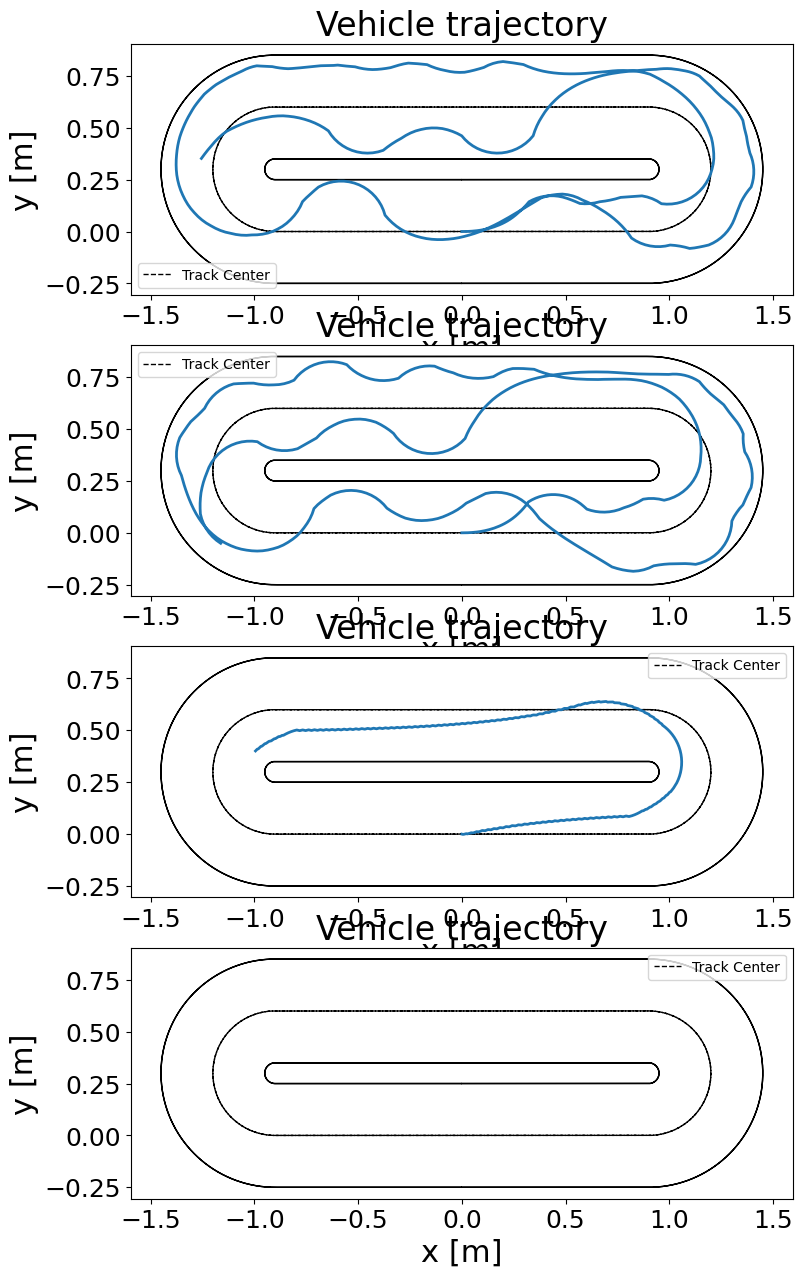

In [63]:
# plot global trajectory and track
save_fig = True
random_seed = random_seeds[0]
n_rows, n_cols = len(filter_types), len(simulation_input_rules)
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, squeeze=False, figsize=(20*n_rows,15*n_cols))
for i, j in product(range(n_rows), range(n_cols)):
    results = dict_results[(random_seed, track_filter_types[0], filter_types[i], simulation_input_rules[j])][0]
    if results is not None:
        results.plot_vehicle_trajectory(ax=axs[i,j], gen=simulator.track_generator)
plt.show()
if save_fig:
    fig.savefig('fig/track_simulation.pdf', bbox_inches='tight')

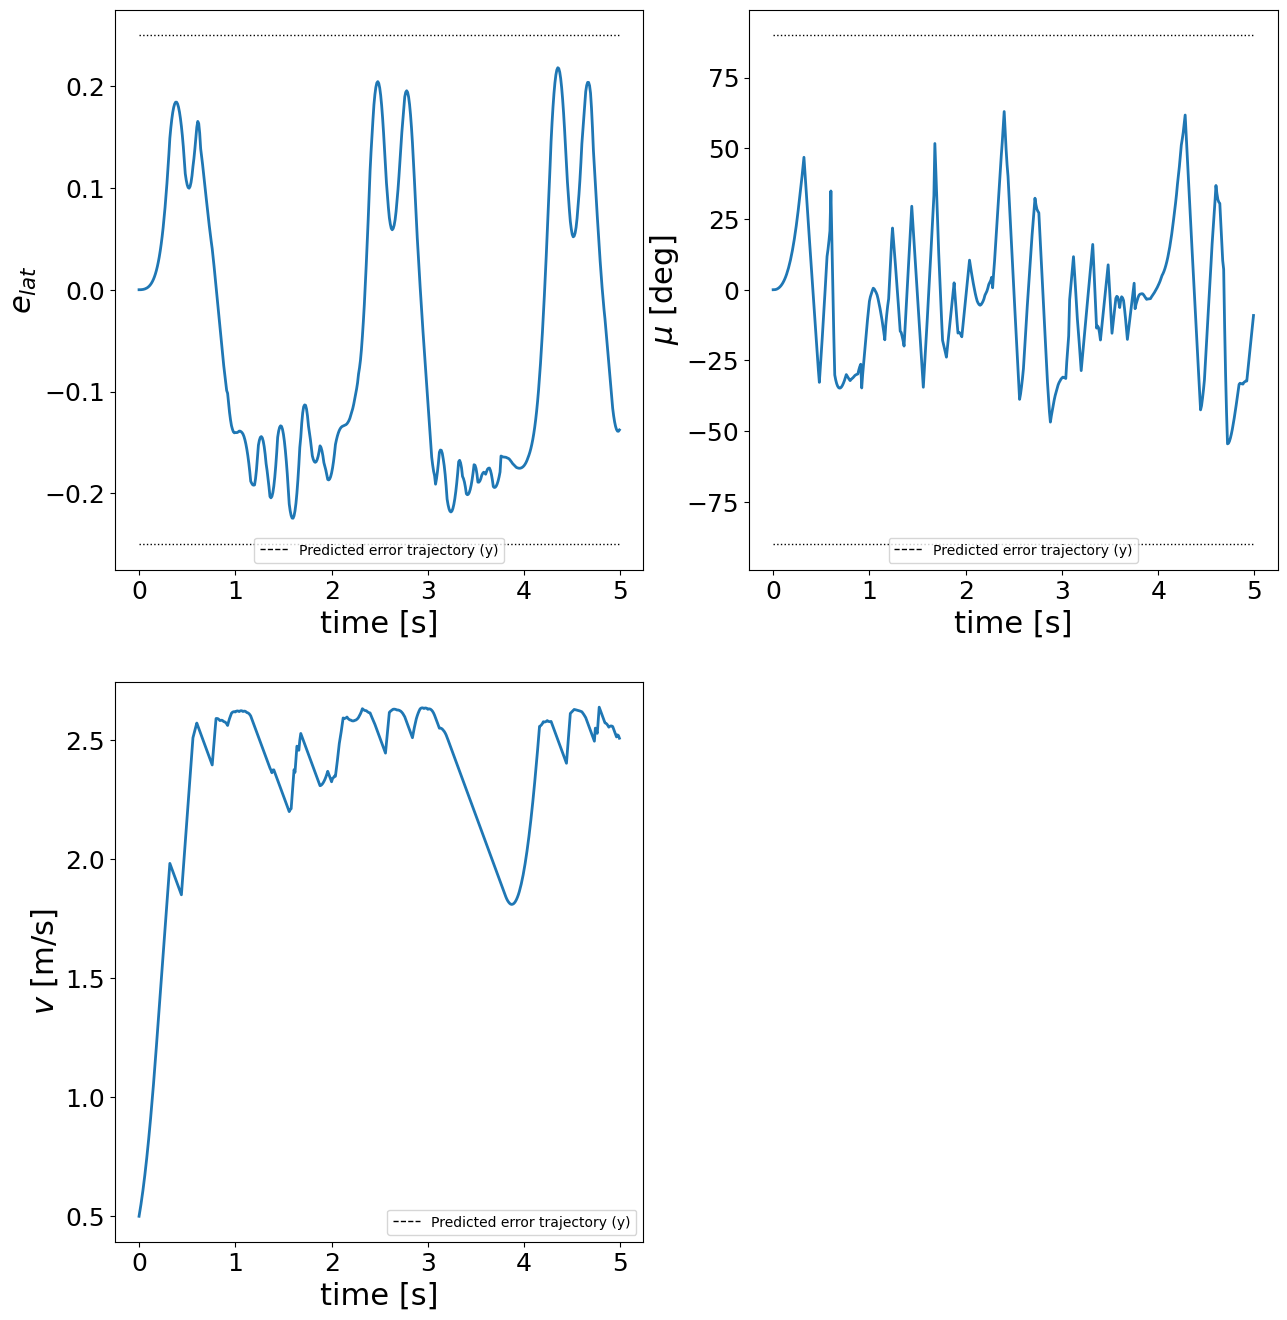

In [64]:
# choose one result to plot details
results = dict_results[(random_seed, track_filter_types[0], SafetyFilterTypes.INDIRECT_FIX_MU, simulation_input_rules[0])][0]
# results = dict_results[(random_seed, track_filter_types[0], SafetyFilterTypes.INDIRECT_ZERO_V, simulation_input_rules[0])][0]

# plot given error dynamics trajectory
plt.figure(figsize=(15,16))
#velocity input
ax = plt.subplot(221)
results.plot_error_trajectory(0, ax, constraint=(-simulator.track_width/2, simulator.track_width/2))
results.plot_predicted_error_slices(0, ax)
ax = plt.subplot(222)
results.plot_error_trajectory(1, ax, constraint=(simulator.mu_min*180/np.pi, simulator.mu_max*180/np.pi))
results.plot_predicted_error_slices(1, ax)
ax = plt.subplot(223)
results.plot_error_trajectory(2, ax)
results.plot_predicted_error_slices(2, ax)
plt.show()

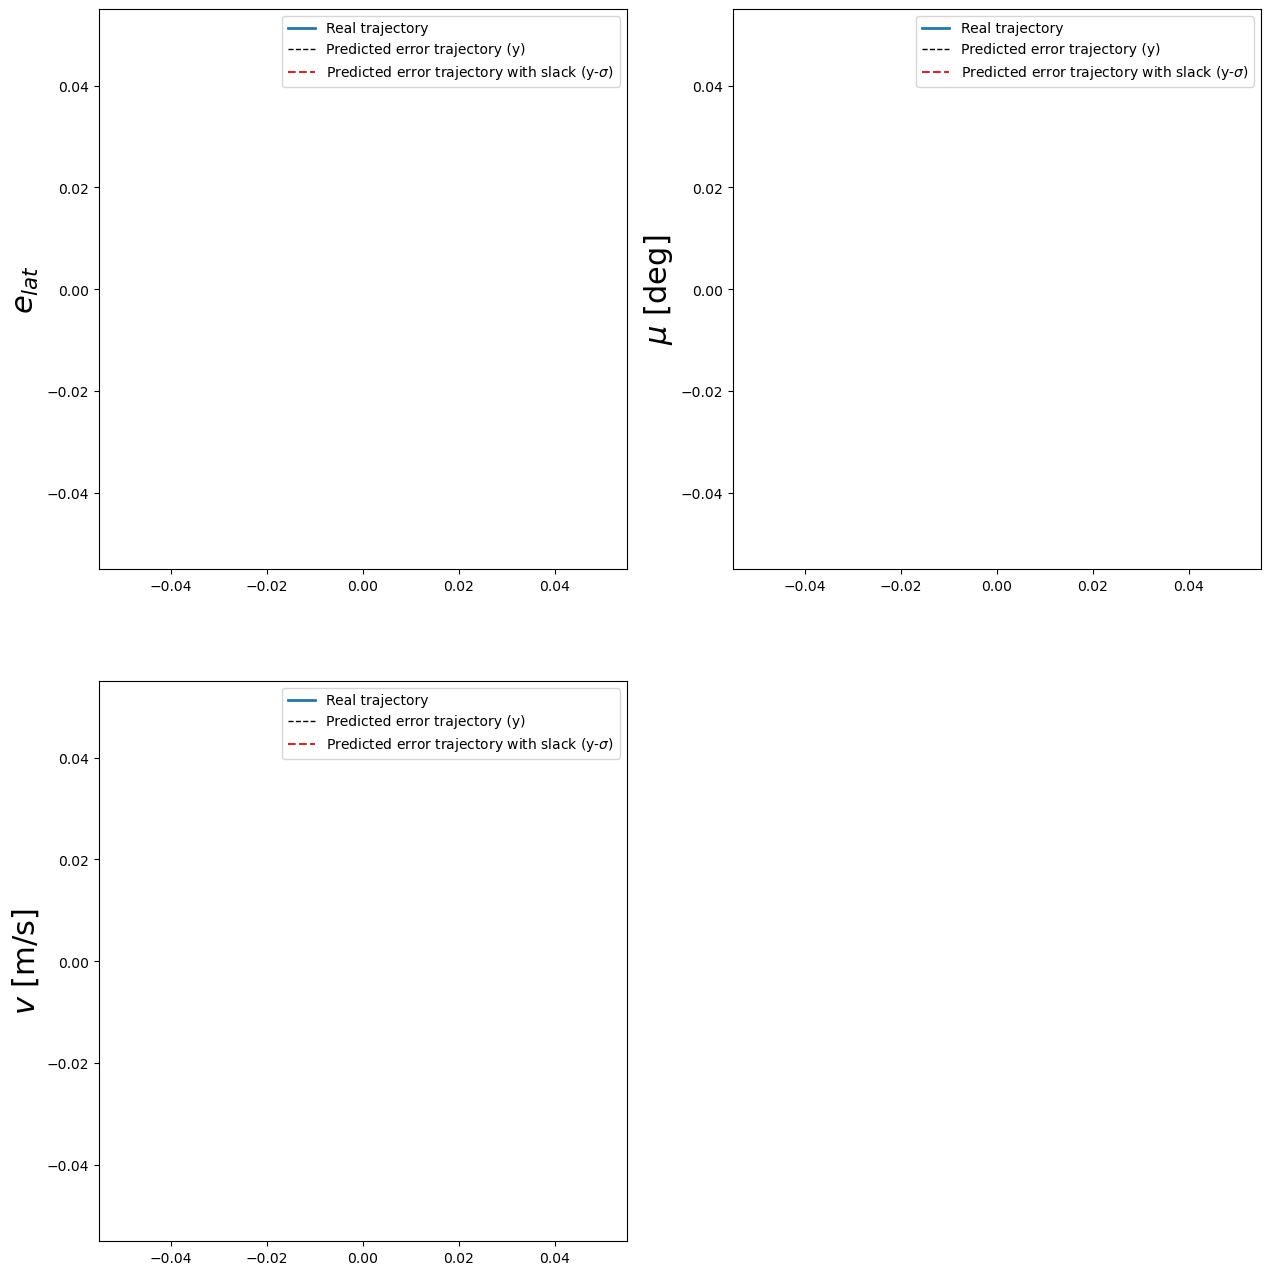

In [65]:
# plot given predicted trajectory and real trajectory
# plt.rcParams['text.usetex'] = True
plt.figure(figsize=(15,16))
#velocity input
ax = plt.subplot(221)
time_spans = [(t-1, t) for t in results.violating_time_steps[0:1]]
# results.plot_error_trajectory(0, ax, constraint=(-simulator.track_width/2, simulator.track_width/2))
results.plot_error_slices(0, ax, line_style=results.trajecory_style, time_span=time_spans)
results.plot_predicted_error_slices(0, ax, label_y_axis=True, time_span=time_spans)
results.plot_predicted_error_with_slack_slices(0, ax, line_style={'color': 'tab:red', 'linestyle': '--', 'linewidth': 1.5}, time_span=time_spans)
ax = plt.subplot(222)
# results.plot_error_trajectory(1, ax, constraint=(simulator.mu_min*180/np.pi, simulator.mu_max*180/np.pi))
results.plot_error_slices(1, ax, line_style=results.trajecory_style, time_span=time_spans)
results.plot_predicted_error_slices(1, ax, label_y_axis=True, time_span=time_spans)
results.plot_predicted_error_with_slack_slices(1, ax, line_style={'color': 'tab:red', 'linestyle': '--', 'linewidth': 1.5}, time_span=time_spans)
ax = plt.subplot(223)
# results.plot_error_trajectory(2, ax)
results.plot_error_slices(2, ax, line_style=results.trajecory_style, time_span=time_spans)
results.plot_predicted_error_slices(2, ax, label_y_axis=True, time_span=time_spans)
results.plot_predicted_error_with_slack_slices(2, ax, line_style={'color': 'tab:red', 'linestyle': '--', 'linewidth': 1.5}, time_span=time_spans)
plt.show()

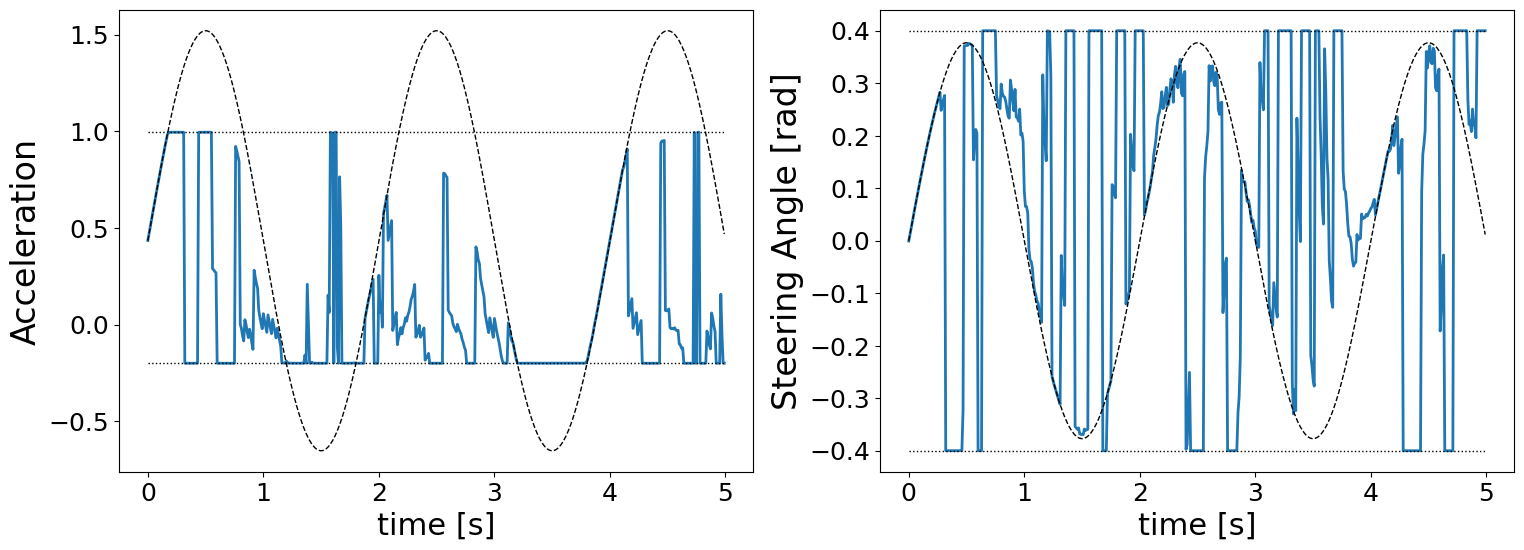

<Figure size 640x480 with 0 Axes>

In [66]:
# plot given and applied inputs
plt.figure(figsize=(18,6))
ax = plt.subplot(121)
results.plot_input_applied(0, ax, constraint=(simulator.a_min*simulator.m, simulator.a_max*simulator.m))
results.plot_input_obj(0, ax)
ax.set_ylabel('Acceleration', fontsize=24)
ax = plt.subplot(122)
results.plot_input_applied(1, ax, constraint=(-simulator.delta_max, simulator.delta_max))
results.plot_input_obj(1, ax)
ax.set_ylabel('Steering Angle [rad]', fontsize=24)
plt.show(block=True)
if save_fig:
    plt.savefig('fig/track_simulation_inputs.pdf', bbox_inches='tight')

In [67]:
sigma_max = results.calculate_sigma_infty_value()
print(sigma_max)

(8.528044159739068e-09, 0.8385849706942015)


In [68]:
sigma_max[1]/np.pi*180

48.04737958387957

In [69]:
def plot_average_itervention(ax: plt.Axes, results: Dict[TrackFilterTypes, Results]) -> plt.Axes:
    """Plot the average intervention for the input corresponds to the input."""
    width = 0.3 # width of bar

    x = np.arange(len(results))
    input_names = ['Torque', 'steering']

    offset = -width/2
    rects = ax.bar(x + offset, [round(result.average_intervention[0],2) for result in results.values()], width, label=input_names[0], color='tab:blue')
    ax.bar_label(rects, padding=3)
    ax.set_ylim(0, 1.5)
    ax.set_ylabel('Torque Intervention')
    ax.legend(loc='upper left', ncols=2)

    ax = ax.twinx()  # instantiate a second axes that shares the same x-axis
    offset = width/2
    rects = ax.bar(x + offset, [round(result.average_intervention[1],2) for result in results.values()], width, label=input_names[1], color='tab:red', hatch='///')
    ax.bar_label(rects, padding=3)
    ax.set_ylim(0, 0.5)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Steering Intervention')
    ax.set_title('MSR Input Intervention for Different Terminal Ingredients')
    ax.set_xticks(x, [key.value for key in results.keys()])
    ax.legend(loc='upper right', ncols=2)
    

{<SafetyFilterTypes.INDIRECT_FITTING_TERMINAL: 'fitting steady state'>: <tools.simualtion_results.Results object at 0x13bf223a0>, <SafetyFilterTypes.INDIRECT_FIX_MU: 'fix mu'>: <tools.simualtion_results.Results object at 0x13b0b2310>, <SafetyFilterTypes.INDIRECT_ZERO_V: 'stop at \n center line'>: <tools.simualtion_results.Results object at 0x14f599790>, <SafetyFilterTypes.INDIRECT_STOP: 'stop anywhere \n on the track'>: <tools.simualtion_results.Results object at 0x11dd7a640>}


AttributeError: 'Results' object has no attribute 'average_intervention'

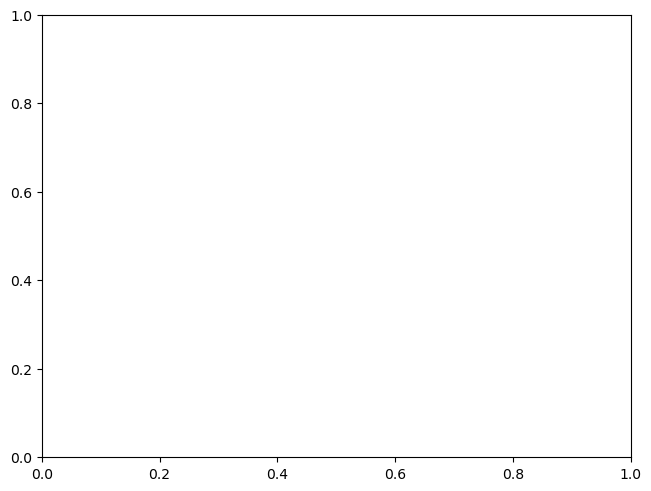

In [70]:
results_dict_filter_types = {
    key[2]: result_list[0] for key, result_list in dict_results.items()
}
print(results_dict_filter_types)
fig, ax = plt.subplots(layout='constrained')

ax = plot_average_itervention(ax, results_dict_filter_types)
ax.set_title('')
if save_fig:
    plt.savefig('fig/track_simulation_intervention.pdf', bbox_inches='tight')

In [ ]:
io_data = simulator.io_data_dict[1/0.5]

plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [y[0,0] for y in io_data._output_data])

KeyError: 2.0

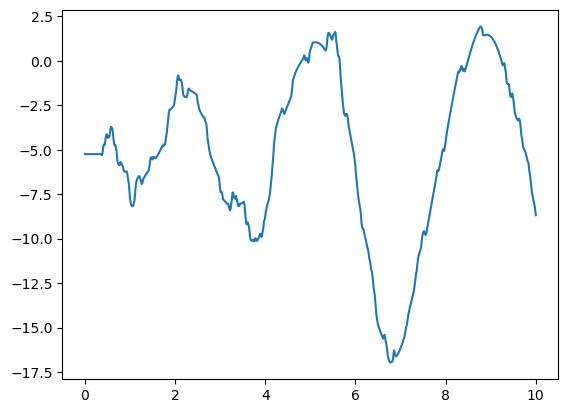

In [ ]:
plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [y[1,0]*180/np.pi for y in io_data._output_data])

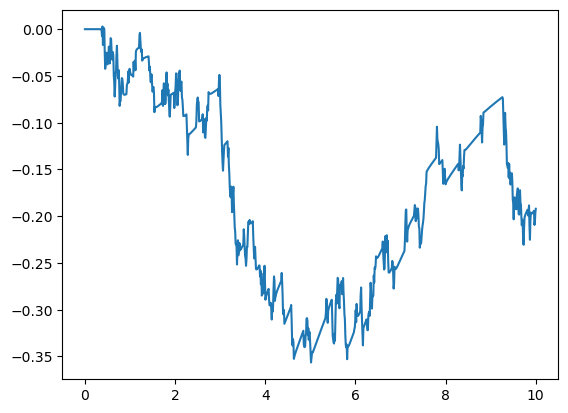

In [ ]:
plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [y[2,0] for y in io_data._output_data])

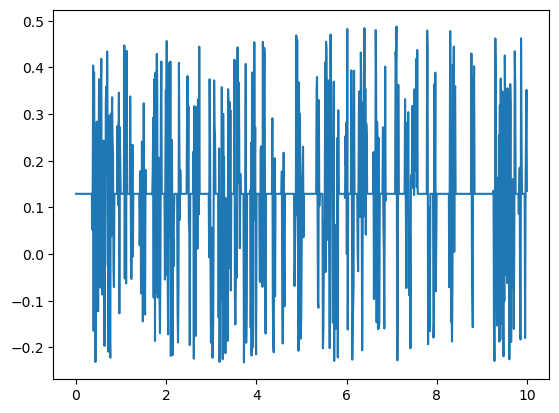

In [ ]:
plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [u[0,0] for u in io_data._input_data])

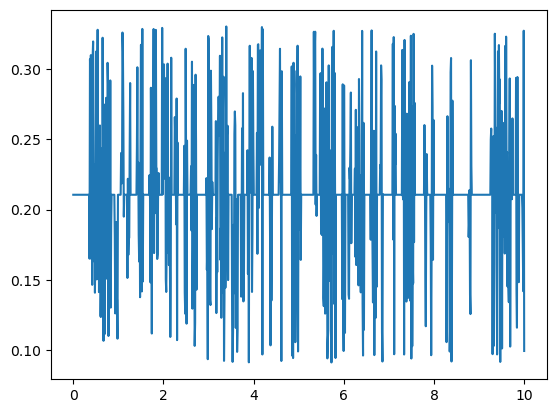

In [ ]:
plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [u[1,0] for u in io_data._input_data])

In [ ]:
error_list = []
for predicted_traj, real_traj in zip(results._predicted_error_with_slack_slices, results._error_trajectory_slices):
    predicted_traj = predicted_traj[1] # extract trajectory
    real_traj = real_traj[1] # extract trajectory
    for predicted_state, real_state in zip(predicted_traj[:], real_traj[:]):
        error_list.append(predicted_state - real_state)

In [ ]:
np.sqrt(np.sum([error[0]**2 for error in error_list])/len(error_list))

0.3265098763291047

In [ ]:
i = 2
# print(simulator.systems[i].cur)
io_data_list = simulator.filter._safety_filters[i]._io_data_list
for io_data in io_data_list:
    print(len(io_data._input_data))

1000
188
144


In [ ]:
import os
import pickle
# # curvature, sample time, [list of time length of io_datas]
# with open(os.path.join(os.getcwd(), 'datasets', f'io_data_random_2.0_0.01_160_240.pkl'), 'wb') as file:
#                         pickle.dump(io_data_list, file)

In [ ]:
results._global_trajectory[885]

array([2.05263330e+00, 1.15578081e-01, 4.07430051e+02, 1.31774522e+00,
       1.46460799e-01, 3.60515754e+00])

In [ ]:
results.mean_calculation_time

0.6474246108133344

In [ ]:
print(len(simulator.buffer_u_value[0][1]))
print(simulator.buffer_u_value[0][1][0])
print(len(simulator.buffer_y_value[0][1]))
print(simulator.buffer_y_value[0][1][0])


100
[0.86994601 0.05565877]
100
[-0.15830183 -0.04127229  0.21862002  0.09307805]


In [ ]:
# from scipy.spatial import ConvexHull, Voronoi
# H_uy = results.H_uy
# H_uy = np.array(H_uy.T)

# vor = Voronoi(H_uy)
# cov_hull = ConvexHull(H_uy)